MIT License

Copyright (c) 2021 Chollette Olisah

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


# Actual Prediction

In [1]:
#Declare Variables
import numpy as np
import csv,sklearn
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import std
from numpy import mean
from pandas import read_csv
from sklearn import metrics
from matplotlib import pyplot
from collections import Counter
import matplotlib.pyplot as plt #for visualization and plot
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
#glucose and output data
data = pd.read_csv('diabetesmerge.csv')

In [3]:
data.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,89,66,94,21,0
1,137,40,168,33,2
2,78,50,88,26,0
3,197,70,543,53,2
4,189,60,846,59,2


In [4]:
# Split data into train and test set
splitRatio = 0.2

train , test = train_test_split(data,test_size = splitRatio,shuffle=True,random_state = 1)

X_train = train[[x for x in train.columns if x not in ["Outcome"]]]
y_train = train[["Outcome"]]

X_test  = test[[x for x in test.columns if x not in ["Outcome"]]]
y_test  = test[["Outcome"]]

Class=0, n=28 (19.310%)
Class=2, n=61 (42.069%)
Class=1, n=56 (38.621%)


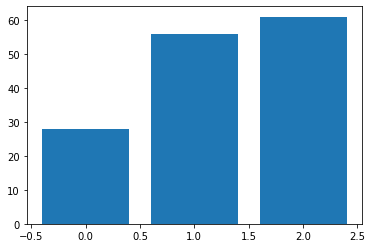

In [5]:
#Visualizing Class Distribution
# summarize 
out = y_test['Outcome']
counter = Counter(out)
for k,v in counter.items():
	per = v / len(out) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
# define the model parameters
modelRF = RandomForestClassifier(max_depth= 2, max_features=3, n_estimators=50)
modelRF = RandomForestClassifier(max_depth= 3, max_features=2, n_estimators=50,min_samples_split=3, min_samples_leaf=4)

#fit the model
modelRF.fit(X_train, y_train)

In [ ]:
# Grid Search for optimizing random forest parameters

param_grid = [
    { 'max_features': [2, 3, 4],'max_depth': [2, 3, 5,6,7,8,9,10],'n_estimators': [10, 50, 100,200,500, 1000]}]

modelRF_grid = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(modelRF_grid, param_grid,
                           scoring='accuracy',
                           return_train_score=True,
                           cv=cv,
                          )
grid_search.fit(X_train, y_train.values.ravel())

In [ ]:
grid_search.best_params_

In [107]:
cv_scores = grid_search.cv_results_

In [ ]:
##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(mean_score, params)

In [8]:
#y_pred_class = grid_search.predict(X_test)
y_pred_class = modelRF.predict(X_test)

In [ ]:
# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class, normalize=True))

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

In [ ]:
# Compare Prediction 
print("Train acc: " , modelRF.score(X_train, y_train))
print("Test acc: ", modelRF.score(X_test, y_test))

In [ ]:
# Compare Prediction 
print("Train acc: " , grid_search.score(X_train, y_train))
print("Test acc: ", grid_search.score(X_test, y_test))

In [111]:
new_df = pd.DataFrame([[100,300,75,64]])
# We predict insulin
prediction = grid_search.predict(new_df)
print(prediction)

In [ ]:
# Prediction
prediction = np.around(modelRF.predict(X_test))
print(metrics.classification_report(y_test,prediction, digits=8))